In [1]:
import pandas as pd
import numpy as np


In [11]:
df=pd.read_csv("train.csv")
#df.head(n=3)
df=df.values
print(df)
x_id=df[:,0]# id vector
x=df[:,1:-2]# x_matrix
y=df[:,-1]# sales price > vector
print(x_id.shape)
print(x.shape)
print(y.shape)

[[1 60 'RL' ... 'WD' 'Normal' 208500]
 [2 20 'RL' ... 'WD' 'Normal' 181500]
 [3 60 'RL' ... 'WD' 'Normal' 223500]
 ...
 [1458 70 'RL' ... 'WD' 'Normal' 266500]
 [1459 20 'RL' ... 'WD' 'Normal' 142125]
 [1460 20 'RL' ... 'WD' 'Normal' 147500]]
(1460,)
(1460, 78)
(1460,)


In [94]:
# Note:- np.mean(matrix ) gives mean of all elements but np.means(axis=0) gives a vector having mean values for each column

In [10]:
# multiply a vector to a matrix give a matrix in which each column is multiplied with corresponding indexed vector
# value-> BROADCASTING
#x=(x-mean_vec)/std_vec# can do like this
#x
#u = np.mean(x,axis=0)
#std = np.std(x,axis=0)
print(x)
# Normalise the Data
#x = (x-u)/std

[[60 'RL' 65.0 ... 2 2008 'WD']
 [20 'RL' 80.0 ... 5 2007 'WD']
 [60 'RL' 68.0 ... 9 2008 'WD']
 ...
 [70 'RL' 66.0 ... 5 2010 'WD']
 [20 'RL' 68.0 ... 4 2010 'WD']
 [20 'RL' 75.0 ... 6 2008 'WD']]


In [6]:
# plot y vs any feature
import matplotlib.pyplot as plt

ValueError: could not convert string to float: 'Grvl'

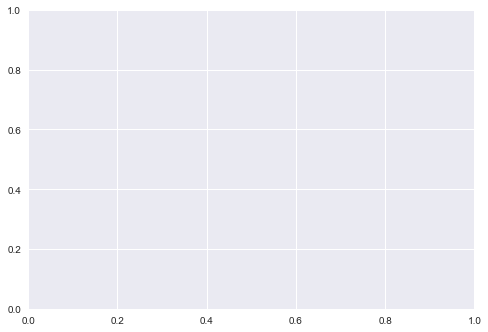

In [7]:
plt.style.use('seaborn')
plt.scatter(x[:,5],y)
plt.show()

#### Linear Regression with multiple features

In [100]:
# X-> matrix (mxn)-> m examples and n features
# x> vector of shape->(n,)

In [101]:
# adding dummy column /feature having all values =1 or X[0]th column using hstack
ones=np.ones((x.shape[0],1))# a matrix
x=np.hstack((ones,x))# in order
print(x.shape)

(506, 14)


In [102]:
def hypothesis(x,theta):# for ith example
    y_=0
    n=x.shape[0]
    for i in range(n):
        y_+=(theta[i]*x[i])
    return y_

In [103]:
def gradient(X,Y,theta):# calculate value of d(j(theta))/d(thetaj)
    m,n=X.shape
    # m->total examples
    #n-> total features (including dummy feature)
    grad=np.zeros((n,))# a vector
    for j in range(n):# for ith feature
        
        
        for i in range(m):# jth example
            
            y_=hypothesis(X[i],theta)
            grad[j]+=(y_-Y[i])*X[i][j]
    return grad/m

In [104]:
# error functon or J(theta)
def error_(X,Y,theta):
    er=0
    m,n=X.shape
    # sum over all examples 
    for i in range(m):
        y_=hypothesis(X[i],theta)
        er+=(Y[i]-y_)**2
    return er/m


In [105]:
def gradient_descent_algo(X,Y,learning_rate=0.1,steps=300):
    m,n=X.shape
    theta=np.zeros((n,))
    error_list=[]
    error_list.append(error_(X,Y,theta))
    
    # now update the value of theta using gradient descent
    for step in range(steps):
        
        error_list.append(error_(X,Y,theta))

        grad=gradient(X,Y,theta)
        for i in range(n):# n elements are there in theta vector
            theta[i]=theta[i]-learning_rate*grad[i]
    return theta,error_list

In [109]:
import time
start = time.time()
theta,error_list = gradient_descent_algo(x,y)
end = time.time()
print("Time taken is ", end-start)

Time taken is  67.18020939826965


In [110]:
theta

array([ 2.25328063e+01, -9.03091692e-01,  1.03815625e+00,  1.53477685e-02,
        6.99554920e-01, -2.02101672e+00,  2.70014278e+00, -1.93085233e-03,
       -3.10234837e+00,  2.34354753e+00, -1.72031485e+00, -2.04614394e+00,
        8.47845679e-01, -3.73089521e+00])

In [111]:
import matplotlib.pyplot as plt

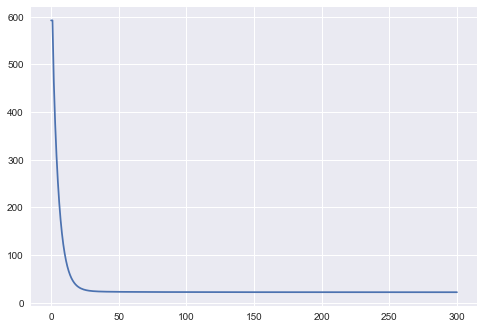

In [112]:
plt.plot(error_list)
plt.show()

#### Predictions

In [114]:
y_ = []
m=x.shape[0]
for i in range(m):
    pred = hypothesis(x[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [115]:
# Accuracy score

def accuracy_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

In [116]:
accuracy_score(y,y_)

74.04541323942743

### Optimizing Code ysing Vectorization /reducing taken time to execute

An Efficent Implemenation for Linear Regression using Vectorization

- Avoid loops in the implemenation, except gradient descent main loop
- Use numpy functions like np.sum(), np.dot() which are quite fast and already optimised

In [117]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e = 0.0
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    
    return e/m
    
def gradient(X,y,theta):
    
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,learning_rate = 0.1,max_iters=300):
    
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        
        #Gradient descent
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
    return theta,error_list

In [118]:
start = time.time()
theta_fast,error_list_fast = gradient_descent(x,y)
end = time.time()
print("Time taken by Vectorized Code",end-start)

Time taken by Vectorized Code 0.021694183349609375


#### time2<<<<time1

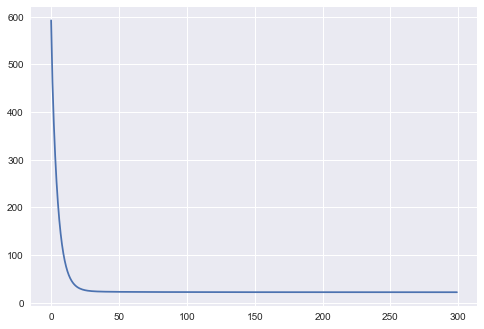

In [119]:
plt.plot(error_list_fast)
plt.show()